# Tuned Models & Voting

## Tuned:

### Decision Trees

 - standard data & upsampled (Performed Better)
     - show predict_proba vs predict
     - Xval prone to overfitting upsample
     
### Logistic Regression

- show for standard

## RF?


 
## Voting

- DT + LR from std

     - predict proba only*

## Imports

In [2]:
#import modules

#SKLearn
import sklearn.model_selection as sk
import sklearn.metrics as m
from sklearn import ensemble as e
from sklearn import svm, linear_model, cluster
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Else
import sys
import pandas as pd
import math
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('default')

#full dfs
%store -r df 
%store -r scaled_df
%store -r fe_df
%store -r df_upsampled

%store -r x_tr
%store -r y_tr
%store -r x_te
%store -r y_te

%store -r xs_tr
%store -r ys_tr
%store -r xs_te
%store -r ys_te

%store -r x_fetr
%store -r y_fetr
%store -r x_fete
%store -r y_fete
%store -r xs_fetr
%store -r ys_fetr
%store -r xs_fete
%store -r ys_fete

%store -r x_uptr
%store -r y_uptr
%store -r x_upte
%store -r y_upte
%store -r xs_uptr
%store -r ys_uptr
%store -r xs_upte
%store -r ys_upte

%store -r cols
%store -r fe_cols
%store -r testsizepercent
%store -r th
%store -r sd

## Functions

In [4]:

def threshold(val, posval):
    return [1 if i>posval else 0 for i in val]

def plotAUC(truth, pred, lab, thresh):
    fpr, tpr, thresholds = m.roc_curve(truth, threshold(pred, thresh))
    roc_auc = m.auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    rets =  [fpr, tpr]
    return



def plot_scores(truth, pred, lab, thresh, rnd, out=False):
    #Scores
    acc_score = m.accuracy_score(truth, threshold(pred, thresh), normalize=True).round(rnd)
    prec_score = m.precision_score(truth, threshold(pred, thresh)).round(rnd)
    rec_score = m.recall_score(truth, threshold(pred, thresh)).round(rnd)
    f_score = m.f1_score(truth, threshold(pred, thresh)).round(rnd)
    avg_precision = m.average_precision_score(truth, threshold(pred, thresh)).round(rnd)
    rets = [acc_score, prec_score, rec_score, f_score, avg_precision]
    if out==True:
        print(lab, 'Average accuracy score: {0:0.2f}'.format(acc_score))
        print(lab, 'Average precision score: {0:0.2f}'.format(prec_score))
        print(lab, 'Average recall score: {0:0.2f}'.format(rec_score))
        print(lab, 'Average F1 score: {0:0.2f}'.format(f_score))
        print(lab, 'Average precision-recall score: {0:0.2f}'.format(avg_precision))
        print("---")
    return rets

## Decision Tree

In [16]:
#Tuned DT on standard class

dt_s1 = DecisionTreeClassifier(criterion='entropy', 
                               min_samples_split=120,
                               min_samples_leaf = 25,
                               max_features = 'auto', 
                               max_depth=72)

dt_s1f = dt_s1.fit(xs_tr, ys_tr)

b = plot_scores(ys_te, dt_s1f.predict_proba(xs_te)[:,1], 
                'DT_Tuned - std', th, sd, out=True)

DT_Tuned - std Average accuracy score: 0.75
DT_Tuned - std Average precision score: 0.91
DT_Tuned - std Average recall score: 0.69
DT_Tuned - std Average F1 score: 0.78
DT_Tuned - std Average precision-recall score: 0.83
---


DT_Tuned - up Average accuracy score: 0.78
DT_Tuned - up Average precision score: 0.91
DT_Tuned - up Average recall score: 0.61
DT_Tuned - up Average F1 score: 0.73
DT_Tuned - up Average precision-recall score: 0.75
---


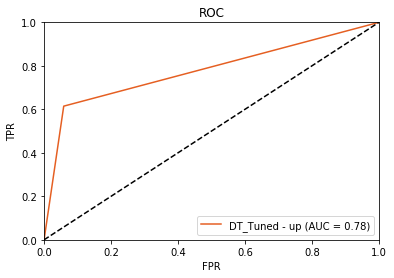

In [17]:
#Tuned DT on upsample
dt_up1 = DecisionTreeClassifier(criterion='entropy', 
                               min_samples_split=25,
                               min_samples_leaf = 25,
                               max_features = 'auto', 
                               max_depth=100)

dt_up1f = dt_up1.fit(xs_uptr, ys_uptr)

b = plot_scores(ys_upte, dt_up1f.predict_proba(xs_upte)[:,1], 
                'DT_Tuned - up', th, sd, out=True)

plotAUC(ys_upte, dt_up1f.predict_proba(xs_upte)[:,1], 'DT_Tuned - up', th)


## Logistic Regression

In [32]:
lr_s1 = linear_model.LogisticRegression(solver='liblinear', 
                                        penalty='l1', 
                                        C=1, 
                                        max_iter=500)

lr_s1f = lr_s1.fit(xs_tr, ys_tr)

b = plot_scores(ys_te, lr_s1f.predict_proba(xs_te)[:,1], 
                'LR_Tuned - std', th, sd, out=True)



NameError: name 'LogisticRegression' is not defined

## Random Forest

In [23]:
#Tuned RF 

rf_s1 = e.RandomForestClassifier(criterion='entropy', 
                               min_samples_split=40,
                               min_samples_leaf = 15,
                               max_features = 'auto', 
                               max_depth=150)
rf_s1f = rf_s1.fit(xs_tr, ys_tr)

b = plot_scores(ys_upte, rf_s1f.predict_proba(xs_upte)[:,1], 
                'RF_Tuned - up', th, sd, out=True)


C:\Users\Jeffs Laptop\.conda\envs\pfds\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF_Tuned - up Average accuracy score: 0.84
RF_Tuned - up Average precision score: 0.90
RF_Tuned - up Average recall score: 0.76
RF_Tuned - up Average F1 score: 0.82
RF_Tuned - up Average precision-recall score: 0.80
---


## PLOT

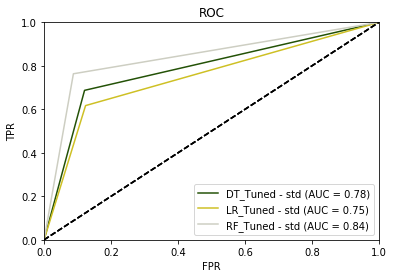

In [30]:
plotAUC(ys_te, dt_s1f.predict_proba(xs_te)[:,1], 'DT_Tuned - std', th)
plotAUC(ys_te, lr_s1f.predict_proba(xs_te)[:,1], 'LR_Tuned - std', th)
plotAUC(ys_upte, rf_s1f.predict_proba(xs_upte)[:,1], 'RF_Tuned - std', th)

## Voting Classifier

Stacked Voter Average accuracy score: 0.86
Stacked Voter Average precision score: 0.86
Stacked Voter Average recall score: 0.94
Stacked Voter Average F1 score: 0.90
Stacked Voter Average precision-recall score: 0.85
---


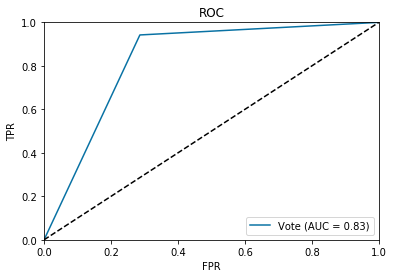

In [28]:
 
vote = e.VotingClassifier(estimators=[('lr', lr_s1), ('DT', dt_s1), ('RF', rf_s1)], voting='hard').fit(xs_tr, ys_tr)

v = plot_scores(ys_te, vote.predict(xs_te), 
                'Stacked Voter', th, sd, out=True)

plotAUC(ys_te, vote.predict(xs_te), 'Vote', th)